In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('..')

import src as sc

# Prepare Campus Data

The cell below can also be carried out in one step by running 
```
> cd src
> python locations.py 
```
from the top level directory.

In [2]:
# One-hot table with halls as rows and schools as columns.
hall_df = sc.get_hall_by_school_table()

# Dataframe with one row per enrolled student.
student_df = sc.get_student_enrollment_data()

# Proportionally assigns students to buildings, writing
# student dataframes to csv as:
#      "../data/filled_buildings/<building_name>_students.csv"

sc.fill_buildings(student_df = student_df, hall_df = hall_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Compute Cost & Assignment Matrix

The cell below can also be carried out in one step by running
```
> cd src
> python learning.py "assign_with_downsampling" -1 10 
```
from the top level directory.

In [3]:
# Load mappings
gender_map, race_map, region_map = sc.get_mapping_dicts()

# Load data
hall_df, student_df, art_df = sc.load_data()

# Get quantized student data.
gender_quant_s, race_quant_s, region_quant_s = sc.get_quantized_student_data(    
                                                    student_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get quantized  art data.
gender_quant_a, race_quant_a, region_quant_a = sc.get_quantized_art_data(    
                                                    art_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get building capacity column vector.
building_capacity = sc.get_building_capacity_df().values

# Compute full n_buildings x n_artworks cost matrix.
cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                    hall_df = hall_df, 
                                    gender_quant_s = gender_quant_s, 
                                    race_quant_s = race_quant_s, 
                                    region_quant_s = region_quant_s, 
                                    gender_quant_a = gender_quant_a, 
                                    race_quant_a = race_quant_a, 
                                    region_quant_a = region_quant_a, 
                                    alpha = -1)

In [4]:
# Get art capacity_df
art_capacity_df = sc.get_art_capacity_with_downsampling(art_df)

# Reduce cost df to remove duplicate columns.
art_capacity = art_capacity_df["capacity"].values.reshape(-1,1)
cost_df = cost_df.loc[:,art_capacity_df["original_index"].values]

P = sc.learn_optimal_assignment(cost_df, 
                             building_capacity, 
                             art_capacity, 
                             lam = 10) # lambda, you can change this.

# Convert the assignment array to a dataframe for readability.
assignment_df = pd.DataFrame(P, index = cost_df.index,
                  columns = art_capacity_df["tuples"].values)

# Create Heatmap Visualization

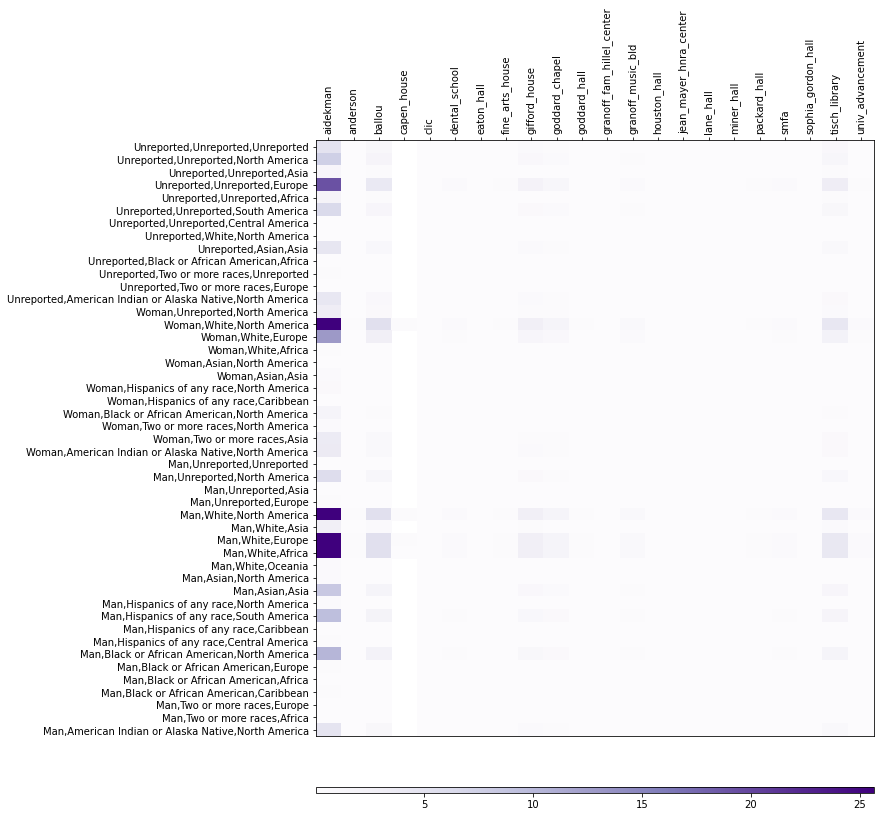

In [5]:
sc.assignment_heatmat(assignment_df)